count    50046.000000
mean        13.406586
std          4.926099
min          1.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         50.000000
Name: unique_question_words, dtype: float64
       answer_start  question_length  context_length  answer_length  \
count  50046.000000     50046.000000    50046.000000   50046.000000   
mean     325.467470        13.718739      169.654358       4.317288   
std      289.410978         5.273109       77.473512       6.205188   
min       -1.000000         1.000000       22.000000       0.000000   
25%      103.000000        10.000000      120.000000       1.000000   
50%      253.000000        13.000000      155.000000       2.000000   
75%      473.000000        17.000000      208.000000       5.000000   
max     3180.000000        62.000000      702.000000     235.000000   

       unique_question_words  
count           50046.000000  
mean               13.406586  
std                 4.926099  
min             

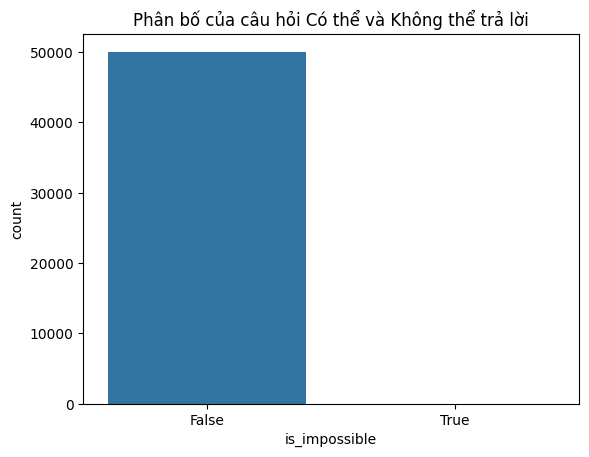

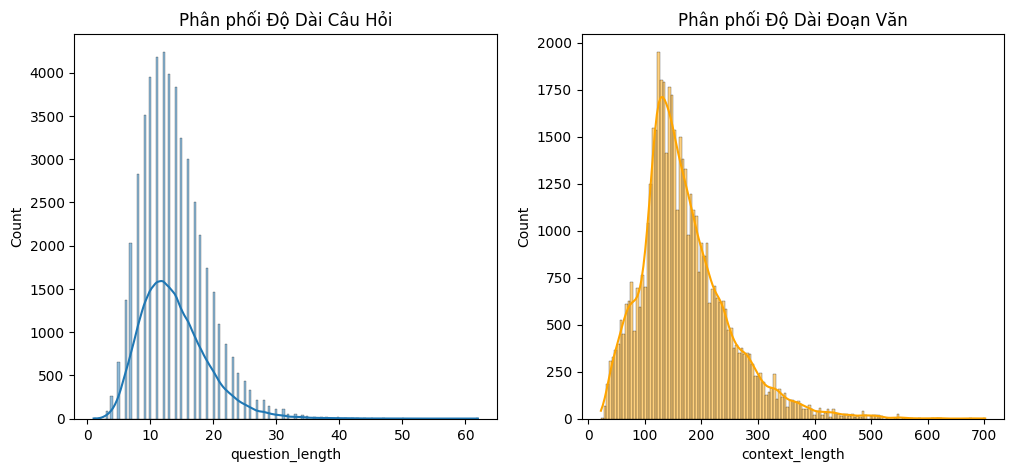

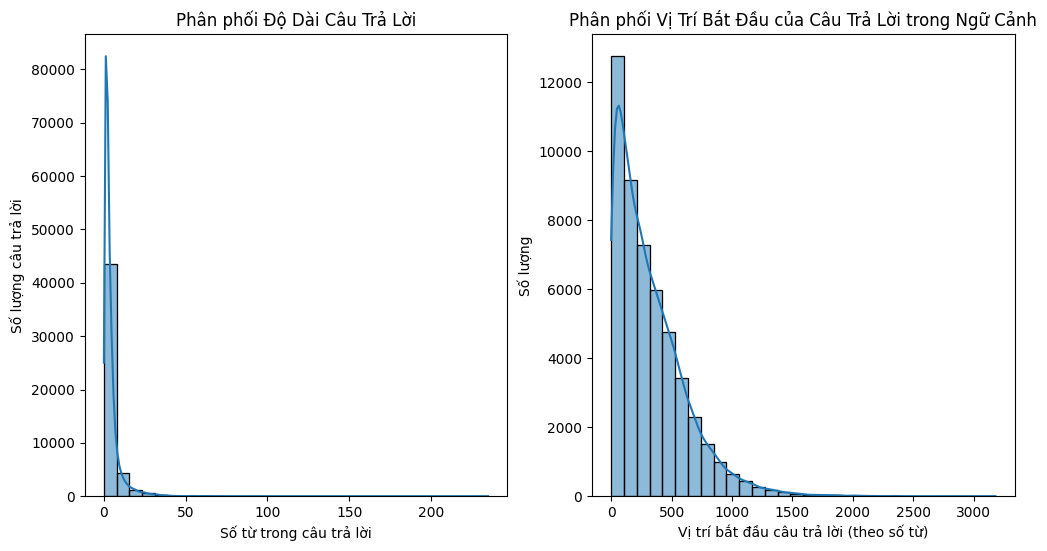

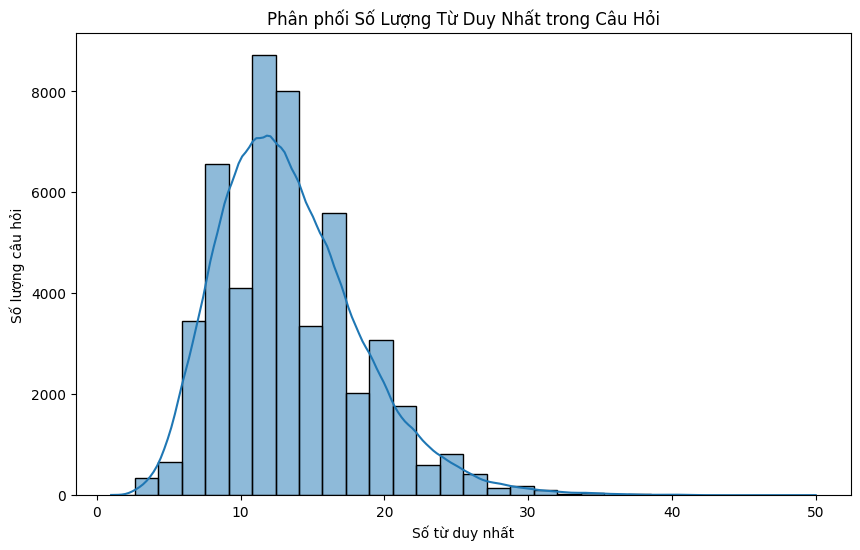

In [11]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

train_path = '/content/train.json'


with open(train_path, 'r') as file:
    data = json.load(file)

# Khởi tạo danh sách để lưu thông tin
context_list = []
question_list = []
is_impossible_list = []
answer_text_list = []
answer_start_list = []

# Lặp qua dữ liệu để tách 'context', 'question', 'is_impossible', 'answers', và 'answer_start'
for item in data:
    context = item['context']
    for qa in item['qas']:
        context_list.append(context)
        question_list.append(qa['question'])
        is_impossible_list.append(qa.get('is_impossible', False))
        # Kiểm tra nếu câu hỏi có thể trả lời, lấy thông tin câu trả lời
        if not qa.get('is_impossible', False):
            answer_text_list.append(qa['answers'][0]['text'])
            answer_start_list.append(qa['answers'][0]['answer_start'])
        else:
            answer_text_list.append(None)
            answer_start_list.append(None)

# Tạo DataFrame
df = pd.DataFrame({
    'context': context_list,
    'question': question_list,
    'is_impossible': is_impossible_list,
    'answer_text': answer_text_list,
    'answer_start': answer_start_list
})

# Thêm cột độ dài cho câu hỏi, đoạn văn, và câu trả lời
df['question_length'] = df['question'].apply(lambda x: len(x.split()))
df['context_length'] = df['context'].apply(lambda x: len(x.split()))
df['answer_length'] = df['answer_text'].dropna().apply(lambda x: len(x.split()))
df['unique_question_words'] = df['question'].apply(lambda x: len(set(x.split())))
print(df['unique_question_words'].describe())

# Hiển thị một số thống kê cơ bản
print(df.describe())

# Tạo một biểu đồ với cả hai giá trị True và False, thêm giá trị True thủ công nếu không tồn tại
counts = df['is_impossible'].value_counts().reindex([False, True], fill_value=0)
sns.barplot(x=counts.index, y=counts.values)
plt.title('Phân bố của câu hỏi Có thể và Không thể trả lời')
plt.xlabel('is_impossible')
plt.ylabel('count')
plt.xticks([0, 1], ['False', 'True'])  # Đảm bảo rằng nhãn trục x là đúng
plt.show()


# Phân phối độ dài câu hỏi và đoạn văn
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['question_length'], kde=True)
plt.title('Phân phối Độ Dài Câu Hỏi')
plt.subplot(1, 2, 2)
sns.histplot(df['context_length'], kde=True, color='orange')
plt.title('Phân phối Độ Dài Đoạn Văn')
plt.show()

# Phân tích độ dài câu trả lời và vị trí bắt đầu của câu trả lời
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['answer_length'].dropna(), bins=30, kde=True)
plt.title('Phân phối Độ Dài Câu Trả Lời')
plt.xlabel('Số từ trong câu trả lời')
plt.ylabel('Số lượng câu trả lời')
plt.subplot(1, 2, 2)
sns.histplot(df['answer_start'].dropna(), bins=30, kde=True)
plt.title('Phân phối Vị Trí Bắt Đầu của Câu Trả Lời trong Ngữ Cảnh')
plt.xlabel('Vị trí bắt đầu câu trả lời (theo số từ)')
plt.ylabel('Số lượng')
plt.show()

# Phân tích về từ duy nhất trong câu hỏi

plt.figure(figsize=(10, 6))
sns.histplot(df['unique_question_words'], bins=30, kde=True)
plt.title('Phân phối Số Lượng Từ Duy Nhất trong Câu Hỏi')
plt.xlabel('Số từ duy nhất')
plt.ylabel('Số lượng câu hỏi')
plt.show()
